## Importing Libraries

In [150]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.axes as ax  

## Loading Data 

In [151]:
df = pd.read_csv('data_for_lr.csv')
df.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [153]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [154]:
print("Original Shape :", df.shape) 
df = df.dropna()
print("Shape after dropping rows with missing values :", df.shape) 

Original Shape : (700, 2)
Shape after dropping rows with missing values : (699, 2)


## Splitting 

In [155]:
# training input and output 
train_input = np.array(df.x[0:500]).reshape(500, 1)
train_input

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [156]:
train_output = np.array(df.y[0:500]).reshape(500, 1)
train_output  

array([[ 21.54945196],
       [ 47.46446305],
       [ 17.21865634],
       [ 36.58639803],
       [ 87.28898389],
       [ 32.46387493],
       [ 10.78089683],
       [ 80.7633986 ],
       [ 24.61215147],
       [  6.96331907],
       [ 11.23757338],
       [ 13.53290206],
       [ 24.60323899],
       [ 39.40049976],
       [ 48.43753838],
       [ 61.69900319],
       [ 26.92832418],
       [ 70.4052055 ],
       [ 29.34092408],
       [ 25.30895192],
       [ 69.02934339],
       [ 84.99484703],
       [ 57.04310305],
       [ 50.5921991 ],
       [ 83.02772202],
       [ 57.05752706],
       [ 47.95883341],
       [ 24.34226432],
       [ 94.68488281],
       [ 48.03970696],
       [  7.08132338],
       [ 21.99239907],
       [ 42.33151664],
       [  0.32908944],
       [ 61.92303698],
       [ 91.17716423],
       [ 39.45358014],
       [  5.99606961],
       [ 22.59015942],
       [ 61.18044414],
       [ 85.02778957],
       [ -1.28631089],
       [ 61.94273962],
       [ 21

In [157]:
# validation input and output 
test_input = np.array(df.x[500:700]).reshape(199, 1)
test_output = np.array(df.y[500:699]).reshape(199, 1)
test_input

array([[  5.],
       [ 61.],
       [ 47.],
       [ 98.],
       [ 30.],
       [ 63.],
       [  0.],
       [100.],
       [ 18.],
       [ 30.],
       [ 98.],
       [ 16.],
       [ 22.],
       [ 55.],
       [ 43.],
       [ 75.],
       [ 91.],
       [ 46.],
       [ 85.],
       [ 55.],
       [ 36.],
       [ 49.],
       [ 94.],
       [ 43.],
       [ 22.],
       [ 37.],
       [ 24.],
       [ 95.],
       [ 61.],
       [ 75.],
       [ 68.],
       [ 58.],
       [  5.],
       [ 53.],
       [ 80.],
       [ 83.],
       [ 25.],
       [ 34.],
       [ 26.],
       [ 90.],
       [ 60.],
       [ 49.],
       [ 19.],
       [ 92.],
       [ 29.],
       [  8.],
       [ 57.],
       [ 29.],
       [ 19.],
       [ 81.],
       [ 50.],
       [ 15.],
       [ 70.],
       [ 39.],
       [ 43.],
       [ 21.],
       [ 98.],
       [ 86.],
       [ 16.],
       [ 25.],
       [ 31.],
       [ 93.],
       [ 67.],
       [ 49.],
       [ 25.],
       [ 88.],
       [ 5

In [158]:
test_output 

array([[  7.68202459],
       [ 61.01858089],
       [ 53.60562216],
       [ 94.47728801],
       [ 27.9645947 ],
       [ 62.55662585],
       [  1.40625441],
       [101.7003412 ],
       [ 13.84973988],
       [ 28.99769315],
       [ 99.04315693],
       [ 15.56135514],
       [ 24.63528393],
       [ 53.98393374],
       [ 42.91449728],
       [ 74.29662112],
       [ 91.17012883],
       [ 49.42440876],
       [ 82.47683519],
       [ 56.15303953],
       [ 37.17063131],
       [ 46.36928662],
       [ 97.02383456],
       [ 40.83182104],
       [ 24.08498313],
       [ 41.14386358],
       [ 21.97388066],
       [100.740897  ],
       [ 61.19971596],
       [ 74.39517002],
       [ 69.04377173],
       [ 56.68718792],
       [  5.86039171],
       [ 55.72021356],
       [ 79.22021816],
       [ 86.30177517],
       [ 25.26971886],
       [ 36.33294447],
       [ 27.65574228],
       [ 94.79690531],
       [ 58.67366671],
       [ 56.15934471],
       [ 18.40919388],
       [ 86

<h1 style="color : gray; font-weight : 700 ;">Linear Regression</h1>

<h2 style = "color : dimgray  ">Forward Propagation</h2>

<p style = "color : lightblue; font-weight : 500 ; ">Hypothesis : f(x) = mx + c </p>

In [159]:
def forward_propagation(train_input, parameters): 
  m = parameters['m']
  c = parameters['c']
  predictions = np.multiply(m, train_input) + c 
  return predictions 

<p style = "color : lightblue; font-weight : 500 ; ">Cost Function : &sum;(y - f(x))<sup>2</sup>&div;2n
 </p>

In [160]:
def cost_function(predictions , train_output):
  cost =  np.mean((train_output - predictions ) ** 2 ) * 0.5 
  return cost 

<h2 style = "color : dimgray  ">Gradient Descent : Backward Propagation</h2>

<p style = "color : lightblue; font-weight : 500 ; ">df = (f(x) -y ) <br/>
dm = (df * x)&div; n  <br/>
dx = (df * 1) &div; n <br/>
 </p>

In [161]:
def backward_propagation(train_input, train_output, predictions) : 
  derivatives = dict() 
  df = predictions - train_output  
  dm = np.mean(np.multiply(df, train_input) )
  dc = np.mean(df)
  derivatives['dm'] = dm 
  derivatives['dc'] = dc 

  return derivatives

<h2 style = "color : dimgray  ">Update Parameters</h2>

<p style = "color : lightblue; font-weight : 500 ; ">
m' = m - (learning_rate * dm )  <br/>
c' = c - (learning_rate * dc )
 </p>

In [162]:
def update_parameters(parameters , derivatives , learning_rate):
  parameters['m'] = parameters['m'] - learning_rate* derivatives['dm']
  parameters['c'] = parameters['c'] - learning_rate*derivatives['dc'] 
  return parameters

<h2 style = "color : dimgray  ">Model Training</h2>

In [163]:
def train(train_input, train_output, learning_rate, it):
  # random parameters 
  parameters = {'m' : 0.02, 'c' : 0.03}
  plt.figure() 

  # loss 
  loss = list() 

  # iteration 
  for i in range(it):

    # forward propagation 
    predictions = forward_propagation(train_input, parameters)

    # cost 
    cost = cost_function(predictions, train_output)
    
    loss.append(cost) 
    print(f'Iteration = {i+1}, Loss = {cost}')

    # plot 
    fig, ax = plt.subplots() 
    ax.plot(train_input , train_output , '+', label = 'Original')
    ax.plot(train_input , predictions, '+', label = 'Training') 

    legend = ax.legend() 

    plt.plot(train_input , train_output , '+', label = 'Original')
    plt.plot(train_input , predictions, '+', label = 'Training') 
    plt.show() 
    
    # backward propagation 
    derivatives = backward_propagation(train_input, train_output, predictions) 

    # update_parameters 
    parameters = update_parameters(parameters, derivatives , learning_rate)

  return parameters , loss 

<h2 style = "color : dimgray ; font-weight : 700;  ">Training</h2>

Iteration = 1, Loss = 1561.389710184408


<Figure size 640x480 with 0 Axes>

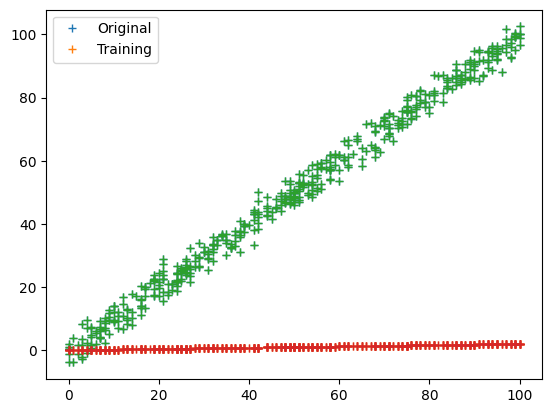

Iteration = 2, Loss = 710.5458927728971


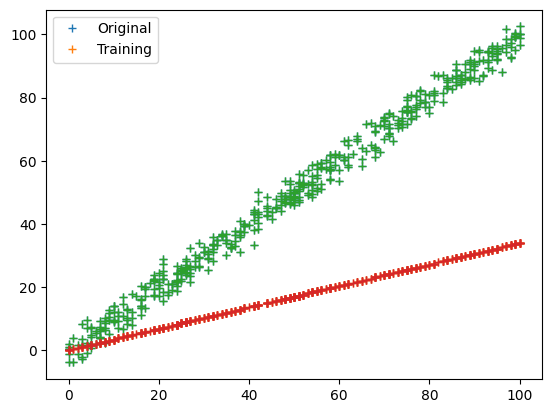

Iteration = 3, Loss = 324.51711011027515


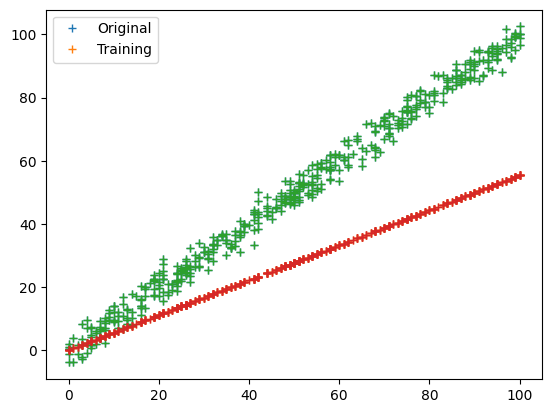

Iteration = 4, Loss = 149.37542356152707


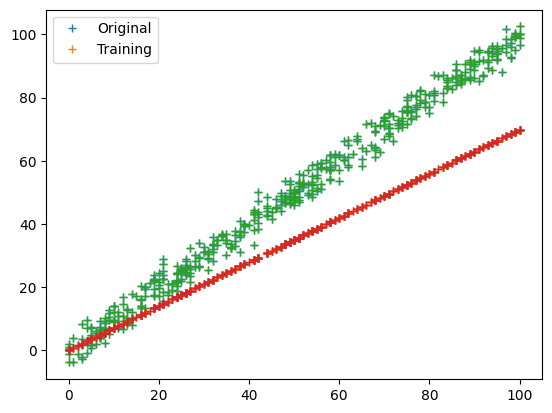

Iteration = 5, Loss = 69.91344610689656


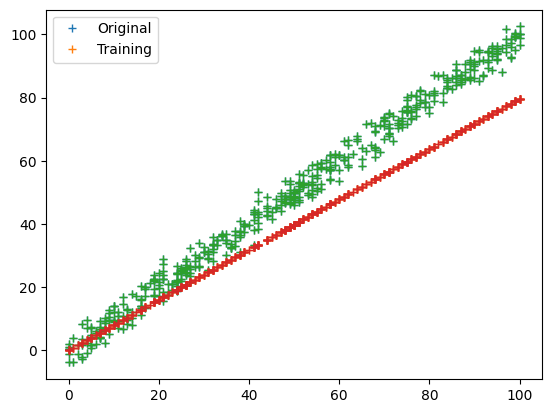

Iteration = 6, Loss = 33.861458647070215


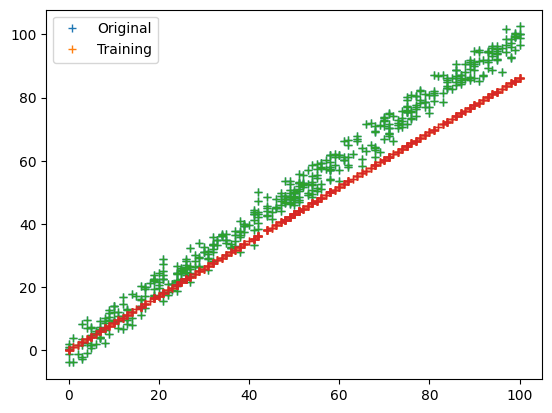

Iteration = 7, Loss = 17.504631730594237


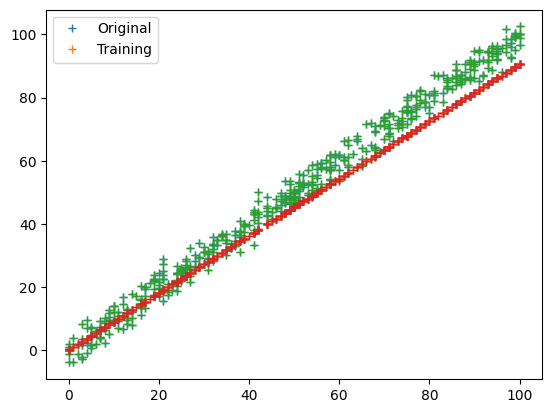

Iteration = 8, Loss = 10.08352096782166


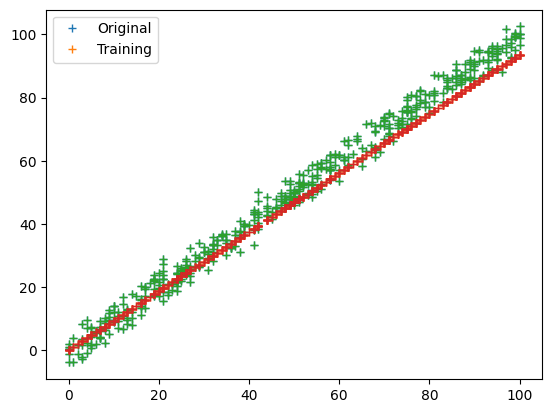

Iteration = 9, Loss = 6.71655452156554


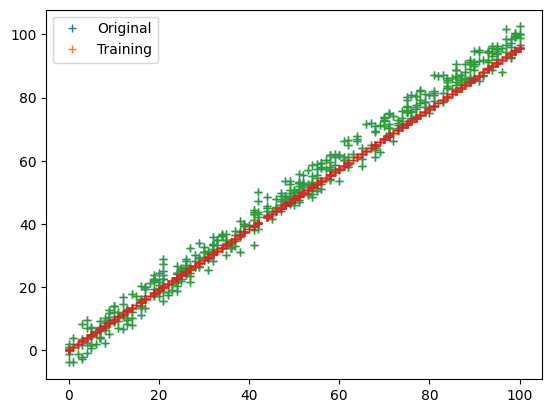

Iteration = 10, Loss = 5.188957842264026


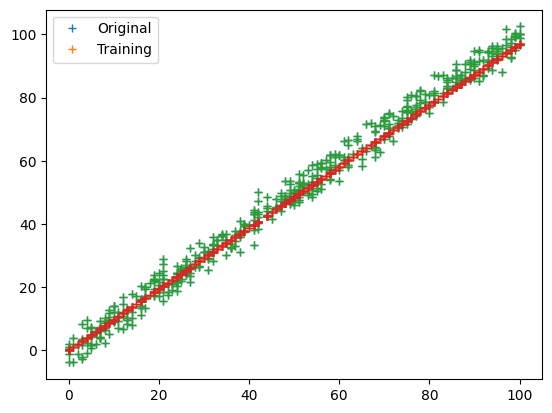

Iteration = 11, Loss = 4.495885263605377


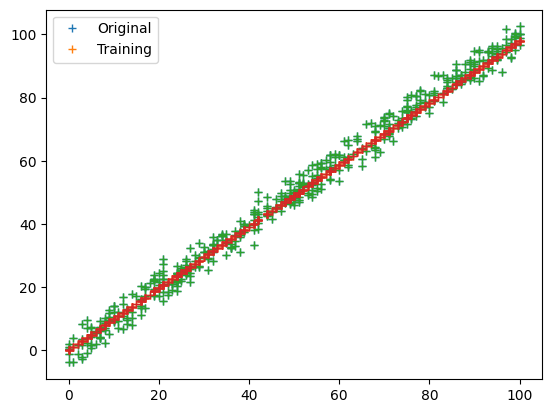

Iteration = 12, Loss = 4.181437193775424


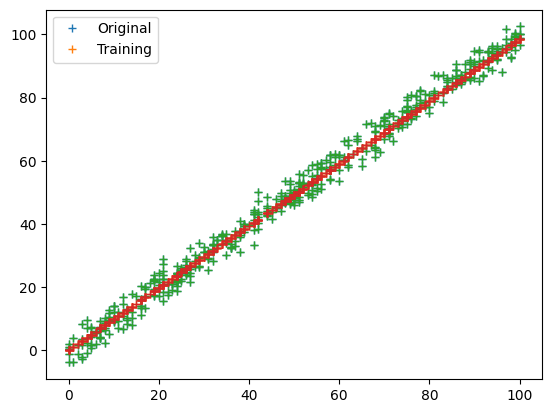

Iteration = 13, Loss = 4.03877148299493


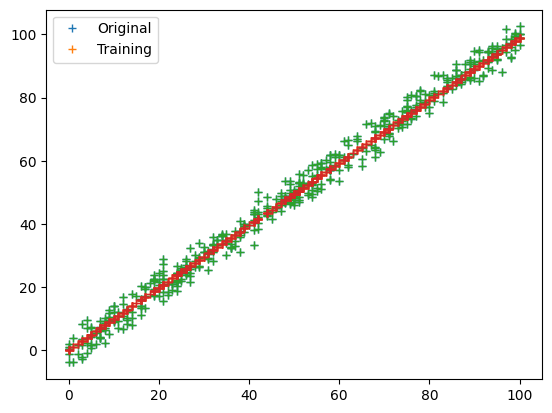

Iteration = 14, Loss = 3.9740436188021575


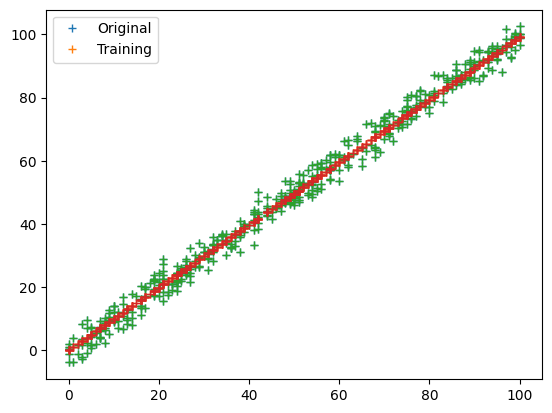

Iteration = 15, Loss = 3.9446762419471675


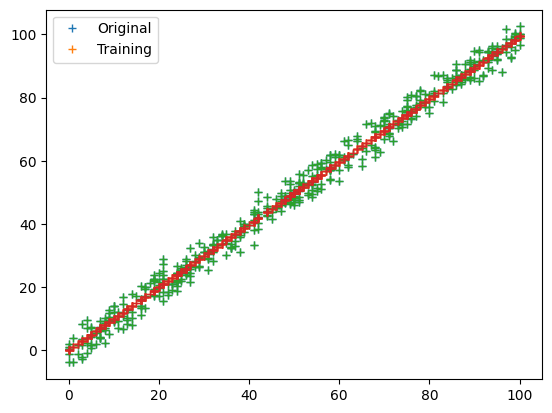

Iteration = 16, Loss = 3.9313519573778217


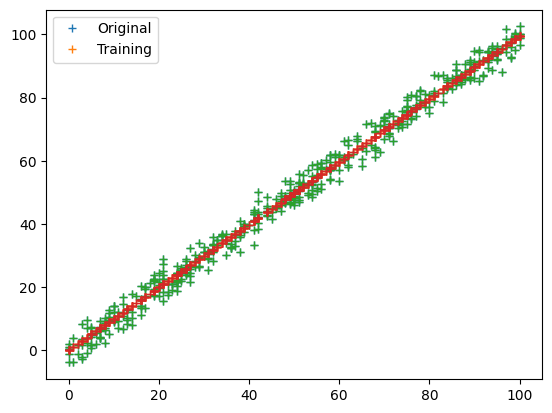

Iteration = 17, Loss = 3.9253064415622245


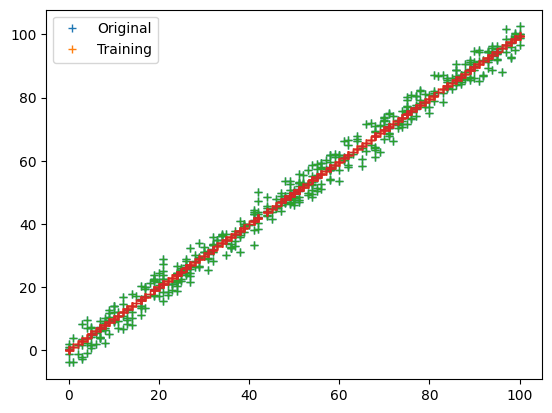

Iteration = 18, Loss = 3.922563311206227


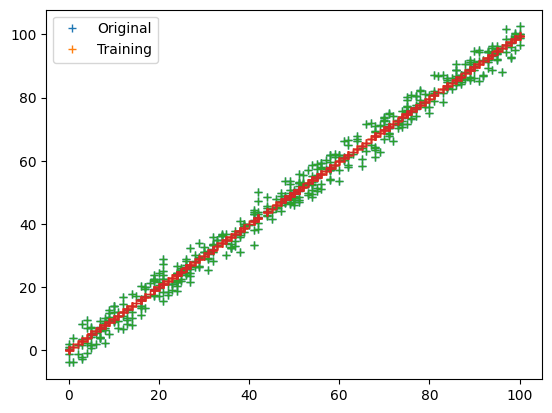

Iteration = 19, Loss = 3.921318476804864


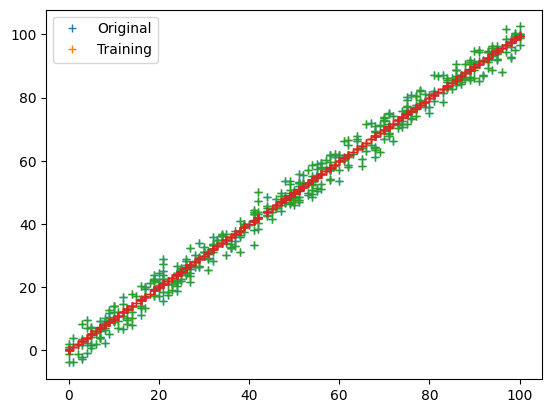

Iteration = 20, Loss = 3.920753420951455


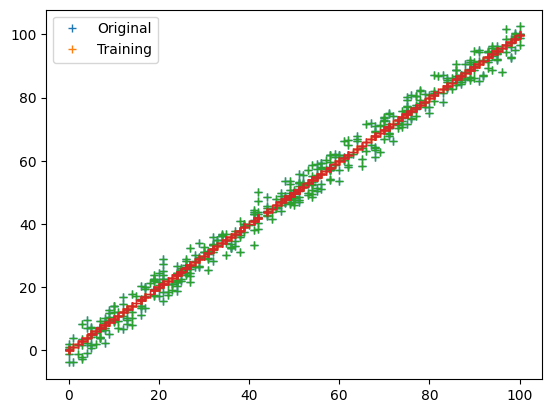

In [164]:
parameters, loss = train(train_input, train_output , 0.0001, 20) 

In [165]:
print(f'Parameters : {parameters}')

Parameters : {'m': 0.9963884310605648, 'c': 0.044642302159195534}


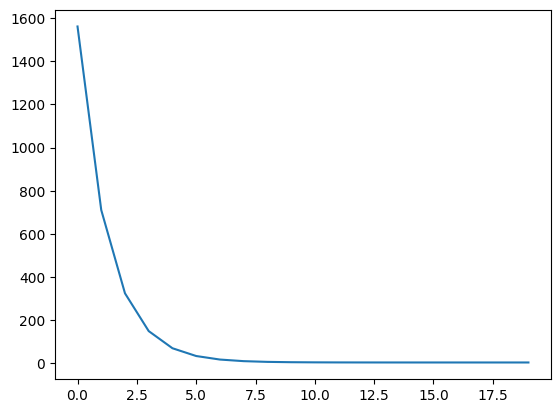

In [166]:
plt.plot(loss)

<h2 style = "color : dimgray ; font-weight : 700 ">Prediction</h2>

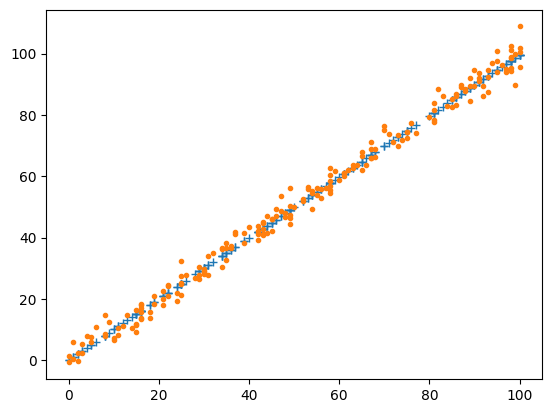

In [167]:
test_predictions = test_input * parameters['m'] + parameters['c']
plt.plot(test_input, test_predictions, '+')
plt.plot(test_input, test_output ,'.')
plt.show()

<h2 style = "color : dimgray  ">Cost of Prediction</h2>

In [168]:
cost_function(test_output, test_predictions)

4.000929225368348